In [ ]:
%tensorflow_version 2.x

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

fashion_mnist is a dataset that keras already has. It contains 60000 training images and 10000 test images.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

This means that train_images contains 60000 images, each of size 28x28 pixels.

In [ ]:
train_images[0, 23, 23]

194

The above value is the value of that pixel in greyscale

In [ ]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'] # Target class names

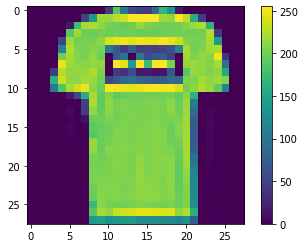

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images/255.0
test_images =  test_images/255.0

The above step is done to get the image greyscale values between 0 and 1, which makes it easier for our neural network model to work.

### Creating the model


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),  # input layer (1)
    tf.keras.layers.Dense(128, activation = 'relu'),  # hidden layer (2)
    tf.keras.layers.Dense(10, activation = 'softmax') # output layer (3)
])

### Compiling the model

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Fitting and testing the model

In [ ]:
model.fit(train_images, train_labels, epochs = 1)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1862 - accuracy: 0.9301


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print('Test Accuarcy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8895
Test Accuarcy:  0.8895000219345093


The piece of code below takes a number as input, and then predicts the image at that particular index in the 'test_images' dataset. The actual image at that index is then printed after it, so we can check if the model predicted correctly or not.

Prediction :  Bag
Actual image: 


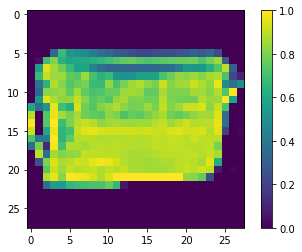

In [38]:
predictions = model.predict(test_images)
no = int(input(print("Enter a number")))
clear_output()
print('Prediction : ', class_names[np.argmax(predictions[no])])
print('Actual image: ')
plt.figure()
plt.imshow(test_images[no])
plt.colorbar()
plt.grid(False)
plt.show()